Задание 1
Сотрудник службы оценки качества продукции заметил, что число бракованных листов стали в партии для стали марки A больше, чем для стали марки B. Также он обратил внимание, что при средней скорости прокатки более 4 м/с число бракованных листов больше. В соответствии с этими наблюдениями, предлагается снизить скорость прокатки и ввести дополнительные меры контроля качества для стали марки A.  


# Обоснуйте, что: Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B. Необходимо подготовить аналитический отчет с программным кодом


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import binom_test

In [2]:
data = pd.read_csv('Статистика за 2018 год.csv', encoding='ISO-8859-1')
data.rename(columns = {'×èñëî áðàêîâàííûõ ëèñòîâ':'defects', 'Ñêîðîñòü ïðîêàòêè': 'speed', 'Ìàðêà ñòàëè': 'stamp'}, inplace = True)
data.head()

,defects,speed,stamp
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B


In [4]:
data['defects>3'] = data['defects']>3
data.head()

,defects,speed,stamp,defects>3
0,3,3.8,A,False
1,3,3.8,B,False
2,3,4.8,B,False
3,4,4.4,B,True
4,6,5.0,B,True


Посмотрим на долю партий с дефектными листами более трех, которые приходятся общее количество партий по соответствующим маркам

In [36]:
data.groupby('stamp').agg({'defects>3': ['count', 'mean']})

defects>3          
          count      mean
stamp                    
A           139  0.381295
B            98  0.448980

Видим, что  38,1% партий марки "А" имеют более 3 дефектов на партию.
Для марки "В" эта доля составляет 44,8%.
Это указывает на то, что утвердение: "Более 3 бракованных листов на партию выходит 
значимо чаще для стали марки А, чем для стали марки B" неверно, так как доля брака 
в таких условиях у марки "B" больше.
Проверим, верно ли, что эта разница в браке марок является статистически значимой.

In [37]:
ttest_ind(data[data['stamp']=='A']['defects>3'], data[data['stamp']=='B']['defects>3'])

Ttest_indResult(statistic=-1.0415849657241676, pvalue=0.29867451363841385)

Видно, что p_value>0.05, следовательно, нет оснований считать, что партии марки "В" чаще имеют более 3 дефектных деталей, чем партии марки "А". 

Возможно, в задании имелась ввиду следующая гипотеза: верно ли, что среди партий с количеством дефектных деталей более 3,  значимо больше партий марки "А"? Проверим данную гипотезу.

In [76]:
defects_over_three = data[data['defects>3']]
defects_over_three['stamp'].value_counts()

A    53
B    44
Name: stamp, dtype: int64

In [79]:
defects_over_three.head()

,defects,speed,stamp,defects>3
3,4,4.4,B,True
4,6,5.0,B,True
5,5,4.4,B,True
11,4,3.9,A,True
12,7,4.4,B,True


In [80]:
binom_test(53, 97, p=0.5)

0.41677484108909935

Из полученных данных понятно,  что нет оснований считать, что среди партий с более чем 3мя бракованными листами, значимо больше партий марки "А"

# При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки.

Посмотрим на визуальное распределение скоростей по количеству партий с браком более трех листов

In [82]:
data.groupby(pd.cut(data['speed'], np.arange(2.0, 7.0, 0.5))).agg({'defects>3': ['count', 'mean']})

defects>3          
               count      mean
speed                         
(2.0, 2.5]         1  0.000000
(2.5, 3.0]         4  0.500000
(3.0, 3.5]        17  0.529412
(3.5, 4.0]        36  0.333333
(4.0, 4.5]        59  0.423729
(4.5, 5.0]        71  0.436620
(5.0, 5.5]        34  0.323529
(5.5, 6.0]        13  0.461538
(6.0, 6.5]         2  0.500000

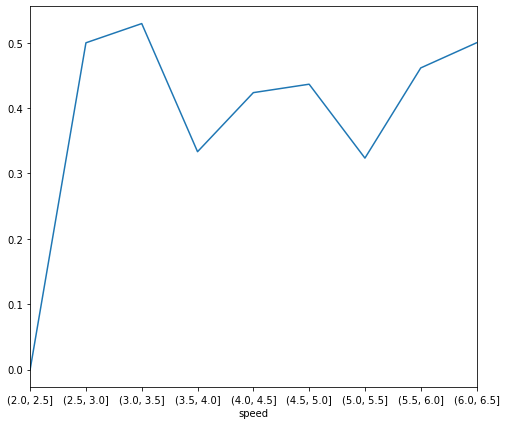

In [83]:
data.groupby(pd.cut(data['speed'], np.arange(2.0, 7.0, 0.5)))['defects>3'].mean().plot(figsize=(8,7))

На первый взгляд, нет оснований считать, что дефектность зависит от скорости.
При скорости не более 2.5 м/с брака нет, однако один лист - это недостаточно для статистической значимости.
При скоростях выше дефекты как набирают обороты,  так и снижаются при скоростях еще выше. В результате график имеет скачкообразные прямые на протяжении всех изменений скорости.
Рассмотрим данные более подробно

In [86]:
data['speed>4'] = data['speed']>4
data.head()

,defects,speed,stamp,defects>3,speed>4
0,3,3.8,A,False,False
1,3,3.8,B,False,False
2,3,4.8,B,False,True
3,4,4.4,B,True,True
4,6,5.0,B,True,True


In [85]:
data.groupby('speed>4').agg({'defects>3': ['count', 'mean']})

defects>3          
            count      mean
speed>4                    
False          58  0.396552
True          179  0.413408

При скорости более 4 м/с действительно партий с браком более 3 листов больше всего на 1,3%. Вспоминая график распределения, еще раз можно сказать, что этого недостаточно для показателя статистической значимости.

In [79]:
ttest_ind(data[~data['speed>4']]['defects>3'], data[data['speed>4']]['defects>3'])

Ttest_indResult(statistic=-0.22595853791729623, pvalue=0.8214300673220607)

Судя по статистической значимости, нет оснований считать, что при скоростях более 4 м/с, доля партий с количетвом дефектов больше 3, значимо больше, чем при меньших скоростях.